# Decision Tree

For this lab experiment I will be using the same dataset I have used for Logistic regression (Adult census data to predict whether income is greater than 50K or No). As I have already completed the data cleaning and preprocessing in the previous notebook I will be using the final exported dataset from that so that the result can be compared in the end.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('final_income_classification.csv')

In [3]:
df

,age,workclass,fnlwgt,education.num,marital.status,sex,capital.gain,capital.loss,hours.per.week,income,...,Race_Asian-Pac-Islander,Race_Black,Race_Other,Race_White,occupation_Adm-clerical,occupation_Craft-repair,occupation_Exec-managerial,occupation_Other-service,occupation_Prof-specialty,occupation_Sales
0,90,0,77053,9,-3,0,0,4356,40,0,...,0,0,0,1,0,0,0,1,0,0
1,82,6,132870,9,-3,0,0,4356,18,0,...,0,0,0,1,0,0,1,0,0,0
2,66,0,186061,10,-3,0,0,4356,40,0,...,0,1,0,0,0,0,0,1,0,0
3,54,6,140359,4,-2,0,0,3900,40,0,...,0,0,0,1,0,0,0,1,0,0
4,41,6,264663,10,-1,0,0,3900,40,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,6,310152,10,0,1,0,0,40,0,...,0,0,0,1,0,0,0,1,0,0
32557,27,6,257302,12,2,0,0,0,38,0,...,0,0,0,1,0,0,0,1,0,0
32558,40,6,154374,9,2,1,0,0,40,1,...,0,0,0,1,0,0,0,1,0,0
32559,58,6,151910,9,-3,0,0,0,40,0,...,0,0,0,1,1,0,0,0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   age                         32561 non-null  int64
 1   workclass                   32561 non-null  int64
 2   fnlwgt                      32561 non-null  int64
 3   education.num               32561 non-null  int64
 4   marital.status              32561 non-null  int64
 5   sex                         32561 non-null  int64
 6   capital.gain                32561 non-null  int64
 7   capital.loss                32561 non-null  int64
 8   hours.per.week              32561 non-null  int64
 9   income                      32561 non-null  int64
 10  Race_Amer-Indian-Eskimo     32561 non-null  int64
 11  Race_Asian-Pac-Islander     32561 non-null  int64
 12  Race_Black                  32561 non-null  int64
 13  Race_Other                  32561 non-null  int64
 14  Race_W

In [5]:
df.describe()

,age,workclass,fnlwgt,education.num,marital.status,sex,capital.gain,capital.loss,hours.per.week,income,...,Race_Asian-Pac-Islander,Race_Black,Race_Other,Race_White,occupation_Adm-clerical,occupation_Craft-repair,occupation_Exec-managerial,occupation_Other-service,occupation_Prof-specialty,occupation_Sales
count,32561.000000,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,...,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,5.178803,1.897784e+05,10.080679,0.538958,0.669205,1077.648844,87.303830,40.437456,0.240810,...,0.031909,0.095943,0.008323,0.854274,0.115783,0.125887,0.124873,0.394214,0.127146,0.112097
std,13.640433,1.729629,1.055500e+05,2.572720,1.555730,0.470506,7385.292085,402.960219,12.347429,0.427581,...,0.175761,0.294518,0.090851,0.352837,0.319969,0.331727,0.330580,0.488689,0.333142,0.315491
min,17.000000,0.000000,1.228500e+04,1.000000,-3.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,5.000000,1.178270e+05,9.000000,0.000000,0.000000,0.000000,0.000000,40.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,6.000000,1.783560e+05,10.000000,0.000000,1.000000,0.000000,0.000000,40.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,48.000000,6.000000,2.370510e+05,12.000000,2.000000,1.000000,0.000000,0.000000,45.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,90.000000,7.000000,1.484705e+06,16.000000,3.000000,1.000000,99999.000000,4356.000000,99.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:>

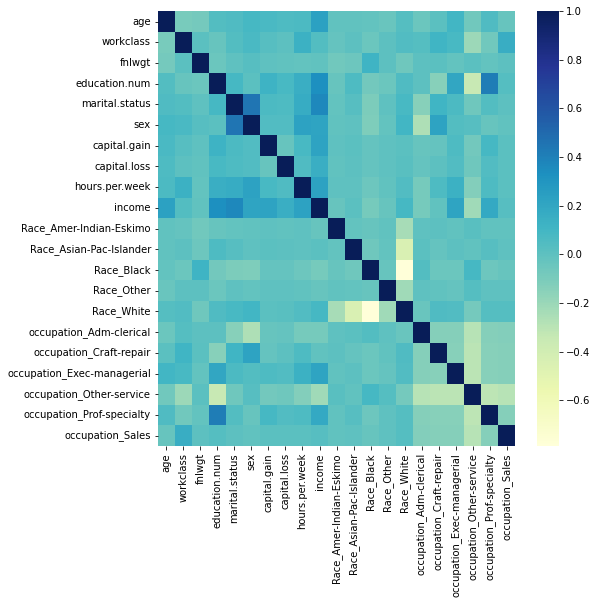

In [6]:
plt.figure(figsize=(8, 8))
sns.heatmap(df.corr(), cmap="YlGnBu")

<AxesSubplot:xlabel='income', ylabel='count'>

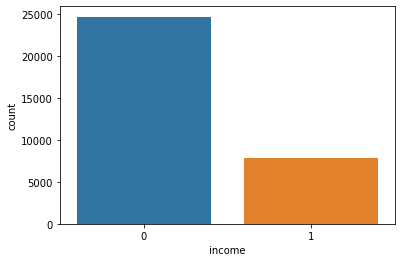

In [7]:
sns.countplot(x='income', data=df)

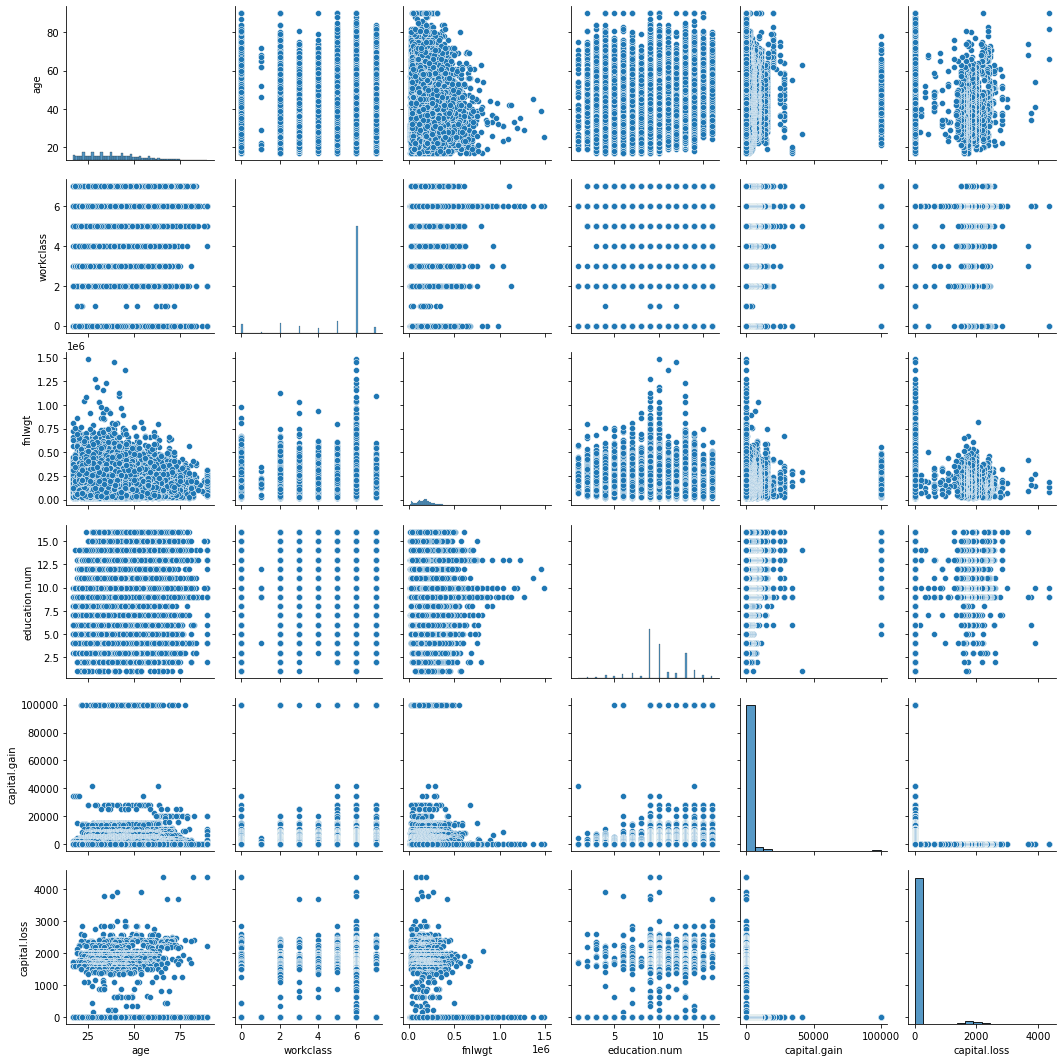

In [8]:
sns.pairplot(df[['age', 'workclass', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss']])

## Data Scaling and Spliting

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [10]:
X = df.drop('income', axis=1)
y = df['income']

I have used the same random state in both of the notebooks (42) so that the train test split happens in the same way.

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [12]:
standard_scalar = StandardScaler()

In [13]:
standard_scalar.fit(X_train)

StandardScaler()

In [14]:
X_scaled_train = standard_scalar.transform(X_train)
X_scaled_test = standard_scalar.transform(X_test)

In [15]:
X_scaled_train

array([[ 1.42910881,  0.47563644,  0.96194408, ..., -0.80225578,
        -0.38257489, -0.35477381],
       [ 1.72352858,  0.47563644, -0.76197267, ..., -0.80225578,
        -0.38257489,  2.81869738],
       [-0.41101475,  0.47563644, -0.49914857, ...,  1.24648525,
        -0.38257489, -0.35477381],
       ...,
       [ 1.20829398, -0.68286805,  0.46275431, ...,  1.24648525,
        -0.38257489, -0.35477381],
       [ 0.17782479,  0.47563644, -0.33752484, ..., -0.80225578,
        -0.38257489, -0.35477381],
       [-1.22066912,  0.47563644, -0.25579011, ...,  1.24648525,
        -0.38257489, -0.35477381]])

## Model Training

In [16]:
from sklearn.tree import DecisionTreeClassifier

In [17]:
model = DecisionTreeClassifier()
model.fit(X_scaled_train, y_train)

DecisionTreeClassifier()

In [18]:
y_pred = model.predict(X_scaled_test)

### Performance Evaluation

In [19]:
from sklearn.metrics import accuracy_score, plot_confusion_matrix, classification_report, plot_precision_recall_curve, plot_roc_curve

In [20]:
print("Accuracy score obtained:",accuracy_score(y_test, y_pred))

Accuracy score obtained: 0.8140034803971747


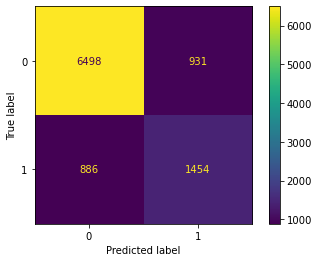

In [21]:
plot_confusion_matrix(model, X_scaled_test, y_test)

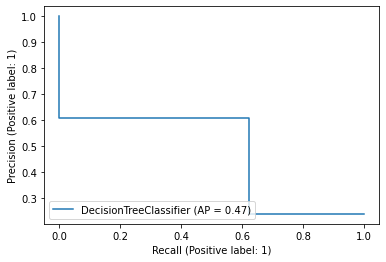

In [22]:
plot_precision_recall_curve(model, X_scaled_test, y_test)

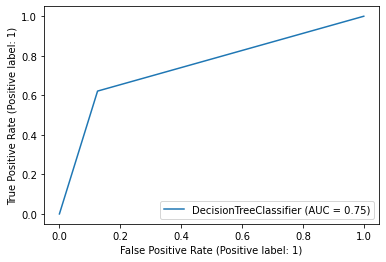

In [23]:
plot_roc_curve(model, X_scaled_test, y_test)

When compared with logistic regression, Logistic regression performed better than this model as it had an accuracy of 84.45% while decision tree has 81.40%. Also the ROC for logistic regression was 0.89 while this has 0.75

## visualizing the model

In [24]:
from sklearn.tree import plot_tree

In [25]:
from sklearn.tree import export_graphviz
from io import StringIO
from IPython.display import Image
import pydotplus

As it is not practical to visualize the model we used above as it has a total of 20 features which will way to many to graph and it is causing the graph to become incomprehensible. So instead I used a part of the features which I felt were more important to the model to get a better idea.

In [26]:
vis_df = df[['age', 'workclass', 'fnlwgt', 'education.num', 'marital.status', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'income',]]

In [27]:
X_vis = vis_df.drop('income', axis=1)
y_vis = vis_df['income']

In [28]:
vis_model = DecisionTreeClassifier(criterion='entropy' ,max_depth=4, min_samples_leaf=30)
vis_model.fit(X_vis, y_vis)

DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=30)

Here again I had to set a max_depth and min_samples_leaf so that the tree doesnt become too big and cause it to become unreadable. So I set a max_depth of 4 and min_samples_leaf to 50 

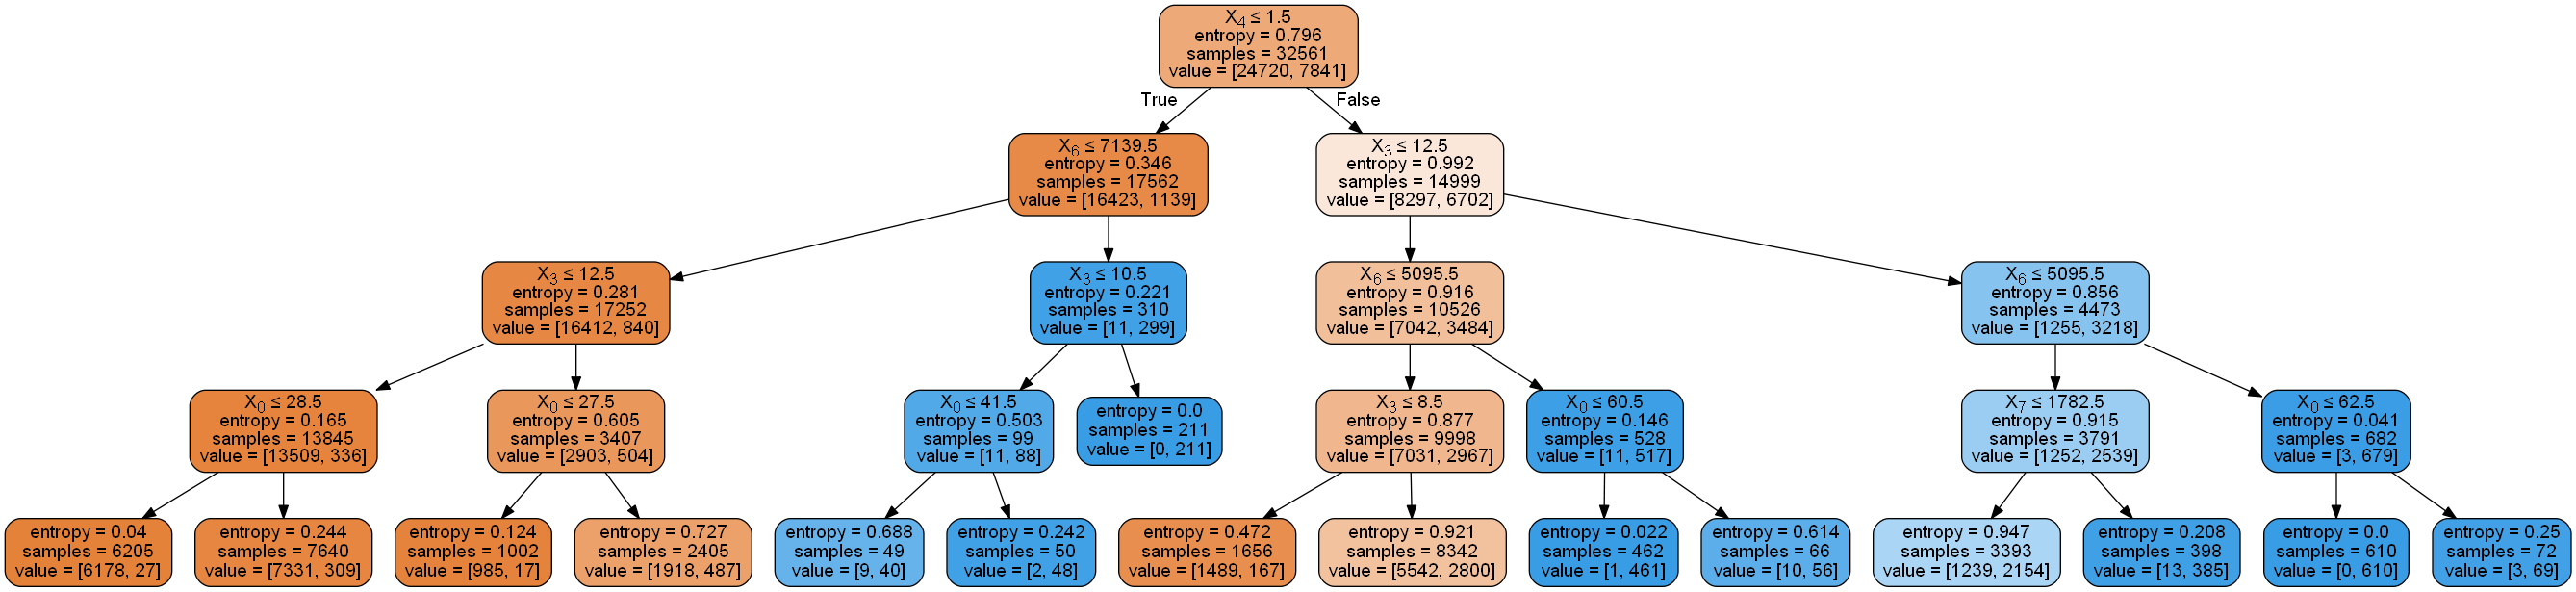

In [29]:
dot_data = StringIO()
export_graphviz(vis_model, out_file=dot_data, filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png(), width=1000, height=5000)